# Pandas ML Cheat Sheet

### Contents

1. Data Cleaning
    - Splitting date
    - Convert strings to categories
    - Ordinal categories
    - Dealing with missing values (`proc_df`)
    - Creating validation set

2. Manipulating Data Frames
    - Subsetting
    - Aggregation functions
    - Joins
    - Plots

Initialisation code:

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from fastai.imports import * # fastai.imports imports range of different libraries e.g. pandas
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # Random Forest Class's we'll use.
from IPython.display import display

from sklearn import metrics

Reading in data:

In [3]:
df_raw = pd.read_csv('/Users/alexhoward/Dropbox/data/bulldozers/train.csv', parse_dates=['saledate'], low_memory=False)

Viewing the top few rows:

In [4]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Standard Data Cleaning Functions

**Splitting date into (potentially) relevant columns:**

In [5]:
add_datepart(df_raw, 'saledate')

In [6]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


Note the extra date columns at the end.

**Coercing strings into categories:**

In [7]:
train_cats(df_raw)

**Order categories:**

In [8]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace = True)

**Dealing with missing values and splitting Data Frame:**

In [9]:
df, y, nas = proc_df(df_raw, 'SalePrice')

**Creating a validation set:**

In [10]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

In [11]:
X_train, X_valid = split_vals(df,12000)

## Manipulating Data Frames with Pandas

Accessing via column:

In [12]:
df_raw.SalePrice.head()

0    66000
1    57000
2    10000
3    38500
4    11000
Name: SalePrice, dtype: int64

This generates a Pandas series, which we can then subset:

In [13]:
df_raw.SalePrice[:10] # Subsetting with columns

0    66000
1    57000
2    10000
3    38500
4    11000
5    26500
6    21000
7    27000
8    21500
9    65000
Name: SalePrice, dtype: int64

If we want to subset directly then we use `.loc` (this allows us to subset rows within the `[]`):

In [14]:
df_raw.loc[[1,2,3,4],:] # Subsetting with columns and rows

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [15]:
df_2 = df_raw.loc[range(5),:]

Now look at subsetting based on values:

In [16]:
df_raw[df_raw.SalePrice > 10000].head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200
5,1139255,26500,1001274,4605,121,3.0,2004,508.0,Low,310G,...,18,3,353,False,False,False,False,False,False,1229558400


This is the same as creating "series" of logicals then subsetting on this:

In [17]:
my_list = df_2.SalePrice > 10000

In [18]:
type(my_list)

pandas.core.series.Series

In [19]:
df_2[my_list]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [20]:
prices = df_2['SalePrice']

In [21]:
print(np.mean(prices), np.std(prices))

36500.0 23008.69400900451


**Key takeaway: a PD dataframe can be composed into individual series, which we can treat as we would a vector and are flexible**

Renaming columns:

In [22]:
new_df = df_2[['SalePrice','ModelID']]

In [23]:
new_df.columns = ['This is not a column of IDs', 'This is not a column of prices']

In [24]:
new_df.head()

,This is not a column of IDs,This is not a column of prices
0,66000,3157
1,57000,77
2,10000,7009
3,38500,332
4,11000,17311


### Aggregation functions:

To start with, we can simply find the mean, std etc. of each column:

In [25]:
X_valid.mean().head()

SalesID         1.943161e+06
MachineID       1.229798e+06
ModelID         6.864627e+03
datasource      1.350872e+02
auctioneerID    6.429942e+00
dtype: float64

In [26]:
X_valid.std().head()

SalesID         912917.534801
MachineID       438683.574904
ModelID           6194.662670
datasource           8.767090
auctioneerID        16.818241
dtype: float64

We can also group by different fields and then calculate the summary statistics:

In [27]:
X_valid.groupby('auctioneerID')

In [28]:
X_valid.groupby('Enclosure', as_index = True).mean() # as_index = True gives new index according to the variable value

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
Enclosure,,,,,,,,,,,,,,,,,,,,,
0,1.876863e+06,1.098098e+06,4932.421384,133.298742,6.078616,1775.698113,486.201258,0.084906,2463.440252,848.603774,...,181.462264,0.040881,0.022013,0.015723,0.006289,0.0,0.0,1.056189e+09,0.012579,0.729560
1,1.849868e+06,1.254884e+06,6719.885717,134.201860,6.511871,1868.790787,794.596368,0.225014,1704.167920,574.326304,...,181.966163,0.031477,0.025315,0.014757,0.006706,0.0,0.0,1.050323e+09,0.050689,0.744237
2,1.908489e+06,1.062478e+06,5192.529412,136.941176,6.117647,1874.470588,1113.176471,0.352941,1051.000000,328.058824,...,206.411765,0.000000,0.058824,0.000000,0.058824,0.0,0.0,1.101834e+09,0.000000,0.647059
3,2.196721e+06,1.142061e+06,7335.161415,137.393864,5.147899,1934.929430,2383.922684,0.522586,1837.665503,624.381660,...,181.416248,0.040047,0.023790,0.021132,0.006794,0.0,0.0,1.175716e+09,0.056125,0.478475
4,1.984385e+06,1.361383e+06,4141.666667,134.666667,2.666667,1654.000000,3321.666667,2.000000,2337.666667,712.666667,...,92.666667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.154506e+09,0.000000,0.333333
5,1.582880e+06,1.220914e+06,4649.500000,132.000000,1.500000,1992.000000,457.500000,1.500000,646.000000,196.500000,...,285.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.065917e+09,0.000000,0.500000
6,1.892454e+06,1.253447e+06,6751.304847,134.657528,7.001723,1908.299441,797.647971,0.320788,1564.992160,513.086447,...,177.225370,0.032372,0.025788,0.012950,0.005762,0.0,0.0,1.075757e+09,0.050504,0.691327


In [29]:
X_valid[['YearMade','ModelID']].groupby('YearMade').sum().head() # Sum of (non-sensical) values

,ModelID
YearMade,
1000,296032412
1919,1011787
1920,319007
1937,26999
1942,7470


For each column, we can also find the number of counts of each value (to be fed into histogram, see plotting section below):

In [30]:
X_valid.Enclosure.value_counts()

6    168878
1    136005
3     83902
0       318
2        17
4         3
5         2
Name: Enclosure, dtype: int64

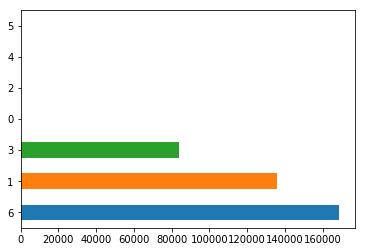

In [31]:
X_valid.Enclosure.value_counts().plot.barh();

When applying `.groupby(<key>)` we simply created an aggregated object:

We can take ratios of different columns to give another series:

In [32]:
(X_valid.ModelID/X_valid.YearMade).head()

12000    26.204000
12001     4.775673
12002     4.780439
12003     8.988000
12004     1.778335
dtype: float64

And we can also sort series:

In [33]:
X_valid.ModelID.sort_values(ascending = False).head()

344551    37198
344553    37197
344555    37197
344520    37197
344544    37197
Name: ModelID, dtype: int64

### Joins:

Create a meaningless aggregation Data Frame, the average modelId for each:

In [34]:
avg_id_per_year = X_valid[['ModelID','YearMade']].groupby('YearMade', as_index = False).mean()

In [35]:
avg_id_per_year.columns = ['YearMade', 'Avg_Model_ID']

In [36]:
avg_id_per_year.head()

,YearMade,Avg_Model_ID
0,1000,8088.317268
1,1919,7966.826772
2,1920,18765.117647
3,1937,26999.000000
4,1942,7470.000000


Most complete way I found to join data frames reliably is using `pd.merge`:

In [37]:
pd.merge(X_valid, avg_id_per_year, how = 'left', on = 'YearMade')[['YearMade','ModelID','Avg_Model_ID']].head()

,YearMade,ModelID,Avg_Model_ID
0,1000,26204,8088.317268
1,2006,9580,11122.442463
2,2004,9580,10035.278278
3,1000,8988,8088.317268
4,1994,3546,4884.509365


The function arguments will allow you to mess with the type of join and joining on columns with different names etc.

### Plots:

**Bar Plots with `.plot.barh()`:**

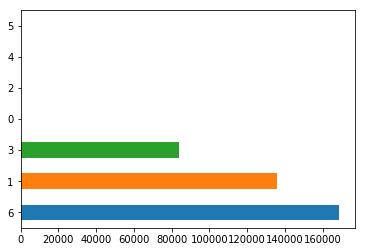

In [41]:
X_valid.Enclosure.value_counts().plot.barh(); # Note here we're first aggregating into value_counts

Note that use `.plot.bar()` for vertical bar charts

**Line graphs with `.plot(x = , y = )`:**

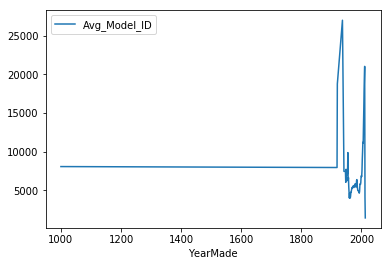

In [44]:
avg_id_per_year.plot(x = 'YearMade', y = 'Avg_Model_ID')

You think some of the diggers probably weren't created in 1000...

**Histograms with `.plot.hist()`:**

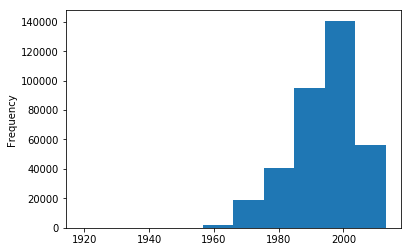

In [48]:
X_valid[X_valid.YearMade > 1900].YearMade.plot.hist()

**Scatter Plots with `.plot.scatter(x = , y = )`:**

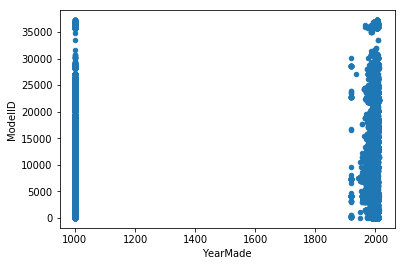

In [49]:
X_valid.plot.scatter(x = 'YearMade', y = 'ModelID')